# **Name: Aditya Mishra | Roll Number: 21013 | Computer Vision Course Project**

### **Connecting to the Directory**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Computer Vision/Course Project

/content/drive/MyDrive/Computer Vision/Course Project


### **Importing Libraries**

In [8]:
import cv2
import numpy as np
from skimage import feature
from google.colab.patches import cv2_imshow

### **Importing the Image**

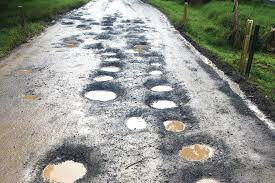

In [12]:
img = cv2.imread('many_potholes.jpeg')
cv2_imshow(img)
# Wait for a key press (not necessary in Colab, as the display is static)
#cv2.waitKey(0)

### **Converting to Grayscale**

In [13]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

### **Applying Guassian Blur**

In [14]:
blur_img=cv2.GaussianBlur(gray_img,(1,1),0)

### **Canny Edge Detector on Blurred Image**

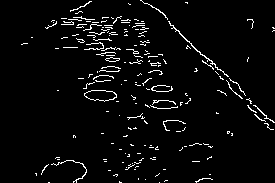

In [15]:
canny_edge=cv2.Canny(blur_img,threshold1=300,threshold2=400,L2gradient=True)
cv2_imshow(canny_edge)

## **Dilating the Edge Detected Image**

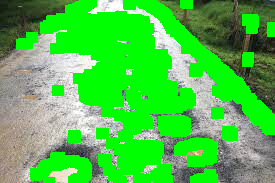

In [16]:
dil_kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges=cv2.dilate(canny_edge, dil_kernel, iterations=5)
dilated_image=img.copy()
dilated_image[dilated_edges>0]=(0,255,0)
cv2_imshow(dilated_image)

### **Contours are Identified and Applied**

Pothole Detection



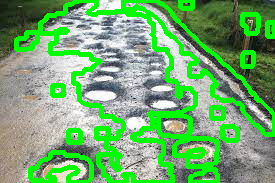

True

In [18]:
contours=cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_img=img.copy()
for contour in contours[0]:
    cv2.drawContours(result_img,[contour],0,(0,255,0),3)
print("Pothole Detection\n")
cv2_imshow(result_img)
cv2.imwrite("img_edge.jpg", result_img)
